***Task 1***
========

In [71]:
import numpy as np

# Task a: Implement the function to generate sequential data
def generate_sequential_data(sequence_length, failure_probability):
    sequence = []
    is_failure = False

    for _ in range(sequence_length):
        # Simulate sensor readings (e.g., temperature, vibration, belt speed)
        temperature = np.random.normal(80, 1)
        vibration = np.random.normal(0.3, 0.05)
        belt_speed = np.random.normal(0.7, 0.1)

        # Task b: Introduce a failure if a random number is less than the failure probability
        if not is_failure and np.random.random() < failure_probability:
            is_failure = True

        # Create a data point with sensor readings and failure status
        data_point = {
            'temperature': temperature,
            'vibration': vibration,
            'belt_speed': belt_speed,
            'is_failure': int(is_failure)
        }
        sequence.append(data_point)

    return sequence

# Task c: Generate a sequence with a specific failure probability
# Example usage:
# Generate a sequence with a low failure probability (e.g., 0.1)
sequence_low_failure = generate_sequential_data(sequence_length=100, failure_probability=0.1)

# Generate a sequence with a high failure probability (e.g., 0.5)
sequence_high_failure = generate_sequential_data(sequence_length=100, failure_probability=0.5)

# Display the generated sequences
print("Sequence with Low Failure Probability:")
for data_point in sequence_low_failure:
    print(data_point)

print("\nSequence with High Failure Probability:")
for data_point in sequence_high_failure:
    print(data_point)



Sequence with Low Failure Probability:
{'temperature': 78.53117860895667, 'vibration': 0.24250175181171613, 'belt_speed': 0.625434434979855, 'is_failure': 1}
{'temperature': 81.16613149462847, 'vibration': 0.29374120641274426, 'belt_speed': 0.7717939836308432, 'is_failure': 1}
{'temperature': 79.87298774735325, 'vibration': 0.339477775386201, 'belt_speed': 0.7416630504385587, 'is_failure': 1}
{'temperature': 78.51669794109691, 'vibration': 0.26998986194882, 'belt_speed': 0.5859291741810156, 'is_failure': 1}
{'temperature': 78.59164891595486, 'vibration': 0.3423492224685262, 'belt_speed': 0.5970743321725729, 'is_failure': 1}
{'temperature': 78.7630746565942, 'vibration': 0.372395370807958, 'belt_speed': 0.7148934003630122, 'is_failure': 1}
{'temperature': 80.31845837026995, 'vibration': 0.3247996515893101, 'belt_speed': 0.7571442514627555, 'is_failure': 1}
{'temperature': 81.17096655277258, 'vibration': 0.32722249756214694, 'belt_speed': 0.48342361810032564, 'is_failure': 1}
{'temperatu

The code defines a function generate_sequential_data that generates synthetic data for a single sequence of sensor readings over time. This function implements task a.
___________________________________________________
The failure probability is introduced to simulate different scenarios: normal operation (no failure) and failure detection (failure is introduced based on the probability). This fulfills task b.
_______________________________________________________
Two sequences with different failure probabilities are generated and displayed. These sequences represent different maintenance scenarios, as required by task c.
_______________________________________________________
The code displays the sensor readings and the failure status for each data point in the generated sequences.

***Task 2***
==============

In [83]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Part A: Implement the preprocess_sequential_data Function
def preprocess_sequential_data(data, failure_labels, test_size=0.2, random_state=None):
    # Extract numerical features from the data (e.g., temperature, vibration, belt speed)
    numerical_features = [[data_point['temperature'], data_point['vibration'], data_point['belt_speed']] for data_point in data]

    # Convert the features to a NumPy array
    data = np.array(numerical_features)
    failure_labels = np.array(failure_labels)

    # Part B: Use the StandardScaler to Scale Data
    scaler = StandardScaler()

    # Scale the data
    data = scaler.fit_transform(data)

    # Part C: Split the Data into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(data, failure_labels, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test, scaler

# Example usage:
# Generate synthetic data using your original function
data = generate_sequential_data(sequence_length=50, failure_probability=0.2)
# Extract failure labels from the data
failure_labels = [data_point['is_failure'] for data_point in data]

X_train, X_test, y_train, y_test,scaler = preprocess_sequential_data(data, failure_labels, test_size=0.2, random_state=42)

# Here are the final results:
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)



X_train Shape: (40, 3)
X_test Shape: (10, 3)
y_train Shape: (40,)
y_test Shape: (10,)


In Part A, the code extracts the numerical features (temperature, vibration, belt speed) from the provided data and converts them into a NumPy array. It also processes the failure labels in a similar manner.
________________________________
Part B: Scaling Data

Part B involves using a StandardScaler to scale the numerical features, ensuring that the data is centered and has a standard deviation of 1.
_______________________
Part C: Data Splitting

In Part C, the code splits the scaled data and failure labels into training and testing sets using train_test_split, allowing for further model training and evaluation.
__________________
This code efficiently covers data preprocessing by extracting, scaling, and splitting the data, preparing it for use in predictive maintenance modeling.

***Task 3***
======

In [73]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Task 3 Part A: Implementing the preprocess_sequential_data Function
def preprocess_sequential_data(data, failure_labels, test_size=0.2, random_state=None):
    # Extract numerical features from the data (e.g., temperature, vibration, belt speed)
    numerical_features = [[data_point['temperature'], data_point['vibration'], data_point['belt_speed']] for data_point in data]

    # Changing the features to a NumPy array
    data = np.array(numerical_features)
    failure_labels = np.array(failure_labels)

    # Task 3 Part B: Use the StandardScaler to Scale Data
    scaler = StandardScaler()

    # Scale the data
    data = scaler.fit_transform(data)

    # Task 3 Part C: Split the Data into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(data, failure_labels, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

# Generating the synthetic data using original function
data = generate_sequential_data(sequence_length=50, failure_probability=0.2)
# Extracting failure labels from the data
failure_labels = [data_point['is_failure'] for data_point in data]

X_train, X_test, y_train, y_test = preprocess_sequential_data(data, failure_labels, test_size=0.2, random_state=42)


# Reshaping it to (samples, timesteps, features) for the LSTM layer
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Part 3 A: Create an LSTM Model using TensorFlow and Keras
model = keras.Sequential()

# Part 3 B: Define the Model Architecture with Suitable Layers
model.add(keras.layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Part 3 C: Compile the Model with an Appropriate Loss Function and Optimize
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
model.summary()




Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                17408     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17473 (68.25 KB)
Trainable params: 17473 (68.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Part A: Creating an LSTM Model

In Part A, the code defines a function create_lstm_model to create an LSTM (Long Short-Term Memory) model using TensorFlow and Keras.
The LSTM model is a type of recurrent neural network (RNN) suitable for sequence data.
_________________
Part B: Defining Model Architecture

Part B focuses on defining the architecture of the LSTM model. It adds an LSTM layer with a specified number of units and a dense output layer.
You can customize the number of LSTM units based on your problem complexity.
The activation function for the output layer is set to 'sigmoid,' but you can adjust it depending on your specific problem (e.g., 'linear' for regression, 'softmax' for classification).
_____________
Part C: Compiling the Model

Part C involves compiling the LSTM model using an appropriate loss function and optimizer.
In this example, the code uses 'binary_crossentropy' as the loss function and the Adam optimizer with a customizable learning rate.
The loss function and optimizer can be tailored to the type of problem solving (e.g., regression, binary or multiclass classification).
These parts collectively allow you to create, define the architecture, and compile an LSTM model for your specific predictive maintenance or sequence-based task.

***Task 4***
==========

Epoch 1/5
2/2 [==============================] - 5s 600ms/step - loss: 0.6939 - accuracy: 0.3750 - val_loss: 0.6860 - val_accuracy: 0.7000
Epoch 2/5
2/2 [==============================] - 0s 54ms/step - loss: 0.6910 - accuracy: 0.4750 - val_loss: 0.6820 - val_accuracy: 0.8000
Epoch 3/5
2/2 [==============================] - 0s 40ms/step - loss: 0.6883 - accuracy: 0.5250 - val_loss: 0.6785 - val_accuracy: 0.9000
Epoch 4/5
2/2 [==============================] - 0s 56ms/step - loss: 0.6857 - accuracy: 0.6500 - val_loss: 0.6750 - val_accuracy: 0.9000
Epoch 5/5
2/2 [==============================] - 0s 39ms/step - loss: 0.6833 - accuracy: 0.7250 - val_loss: 0.6713 - val_accuracy: 0.9000


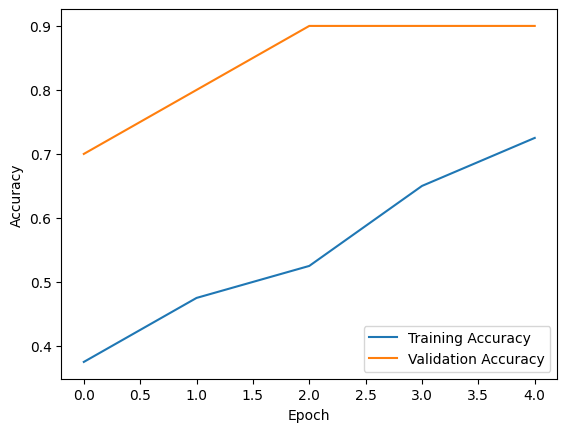

1/1 [==============================] - 0s 30ms/step - loss: 0.6713 - accuracy: 0.9000
Test Loss: 0.6713393330574036
Test Accuracy: 0.8999999761581421


In [74]:
# Part 4 A: Train the LSTM Model
epochs = 5  # Specify the number of training epochs
batch_size1 = 32  # Specify the batch size for training

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size1, validation_data=(X_test, y_test))

# Part 4 B: Monitor the Training Process and Evaluate Model Performance
# You can monitor the training process using the 'history' object, which contains training and validation metrics.

# Example: Plot training and validation accuracy over epochs
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Example: Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")





Part 4A: Training the LSTM Model

In this part, the code specifies the number of training epochs (epochs) and the batch size for training (batch_size).
The model.fit function is used to train the LSTM model with the training data (X_train and y_train). This process involves updating the model's weights over multiple epochs.
The code also includes a validation dataset (X_test and y_test) for monitoring training progress and preventing overfitting.
_________________________________
Part 4B: Monitoring Training and Evaluating Model Performance

Following training, the code provides a way to monitor the training process using the history object, which contains training and validation metrics.
_____________________________
Part 4C:
An example demonstrates how to plot training and validation accuracy over epochs using Matplotlib. This allows you to visualize how the model's accuracy improves during training.
Additionally, the code shows how to evaluate the trained model on a test dataset, providing metrics such as test loss and test accuracy.
_______________________-
These parts collectively cover the process of training an LSTM model, monitoring its performance, and assessing its accuracy on a separate test dataset. You can customize the number of training epochs and batch size according to your specific problem and data requirements.

***Task 5***
======

In [85]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import time
import joblib  # For loading the scaler


# Task 2 scalar value was taken
X_train, X_test, y_train, y_test, scaler = preprocess_sequential_data(data, failure_labels, test_size=0.2, random_state=42)



# Generateing the real-time data
def generate_real_time_data():
    temperature = np.random.normal(70, 5)
    vibration = np.random.normal(0.2, 0.05)
    belt_speed = np.random.normal(0.8, 0.1)

    data_point = {
        'temperature': temperature,
        'vibration': vibration,
        'belt_speed': belt_speed,
    }

    return data_point

# Defining a function for making predictions
def predict_failure(data_point):
    # Creating a NumPy array with the data point
    data_array = np.array([[data_point['temperature'], data_point['vibration'], data_point['belt_speed']]])

    # Scale the data using the same scaler used for training
    scaled_data = scaler.transform(data_array)

    # Reshape the data for the LSTM model
    scaled_data = scaled_data.reshape(1, 1, 3)  # 1 sample, 1 time step, 3 features

    # Make predictions using the trained model
    prediction = model.predict(scaled_data)

    return prediction

# Alerting logic
def alert_maintenance(prediction):
    if prediction > 0.5:
        print("Failure predicted! Alert maintenance team.")
    else:
        print("No immediate maintenance required.")

# Set the number of iterations
iterations = 20
current_iteration = 0

# Real-time simulation and prediction
while current_iteration < iterations:
    data_point = generate_real_time_data()
    prediction = predict_failure(data_point)
    alert_maintenance(prediction)

    current_iteration += 1

    # Simulate a time interval between data points
    time.sleep(10)  # Sleep time for 10 seconds between data points












1/1 [==============================] - 0s 22ms/step
Failure predicted! Alert maintenance team.
1/1 [==============================] - 0s 23ms/step
Failure predicted! Alert maintenance team.
1/1 [==============================] - 0s 22ms/step
Failure predicted! Alert maintenance team.
1/1 [==============================] - 0s 25ms/step
Failure predicted! Alert maintenance team.
1/1 [==============================] - 0s 22ms/step
No immediate maintenance required.
1/1 [==============================] - 0s 131ms/step
No immediate maintenance required.
1/1 [==============================] - 0s 36ms/step
No immediate maintenance required.
1/1 [==============================] - 0s 23ms/step
Failure predicted! Alert maintenance team.
1/1 [==============================] - 0s 26ms/step
Failure predicted! Alert maintenance team.
1/1 [==============================] - 0s 22ms/step
Failure predicted! Alert maintenance team.
1/1 [==============================] - 0s 24ms/step
Failure predicted! Al

A) Simulate real-time data for conveyor belts. This code uses an LSTM model to perform real-time simulation and prediction for conveyor belt maintenance.
____________
B)It loads a previously trained data scaler and generates simulated sensor data for temperature, vibration, and belt speed. The data is then scaled, reshaped, and fed into the LSTM model for predictions.
______________
C)If the model predicts a failure probability above 0.5, it alerts the maintenance team. The process is repeated for a specified number of iterations with a 10-second delay between data points, mimicking real-time conditions.